In [55]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def cadence (dataset):
    reading = np.load(dataset['img_path'])
    figure = plt.figure(figsize=(18, 12))
    for i in range(6):
        ax = plt.subplot(6, 1, i + 1)
        plt.imshow(reading[i].astype(float), interpolation='nearest', aspect='auto')

        if i == 0:
            ax.set_title("target="+str(dataset['target'])+" " + " id=" + dataset['id'])
        plt.text(5, 100, ["ON", "OFF"][i % 2], bbox={'facecolor': 'green'})
        plt.colorbar()
    plt.show()

def diff_cadence (dataset):
    reading = np.load(dataset['img_path'])
    figure = plt.figure(figsize=(18, 6))
    diff = []
    for i in [0,2,4]:
        diff.append(reading[i] - reading[i+1])
    for i in range(len(diff)):
        ax = plt.subplot(3, 1, i + 1)
        plt.imshow(diff[i].astype(float), interpolation='nearest', aspect='auto')

        if i == 0:
            ax.set_title("target="+str(dataset['target'])+" " + " id=" + dataset['id'])
        plt.text(5, 100, ["DIFF-"+ str((i+1)*2-1) + "-"+ str((i+1)*2)], bbox={'facecolor': 'green'})
        plt.colorbar()
    plt.show()


train = pd.read_csv('./seti-breakthrough-listen/train_labels.csv')
print('Train shape is', train.shape )
train.head()

train['img_path']=train['id'].apply(lambda x:f'./seti-breakthrough-listen/train/{x[0]}/{x}.npy')
train.head()


#cadence('./seti-breakthrough-listen/train/0/0242546174808dd.npy')

Train shape is (60000, 2)


id  target                                           img_path
0  0000799a2b2c42d       0  ./seti-breakthrough-listen/train/0/0000799a2b2...
1  00042890562ff68       0  ./seti-breakthrough-listen/train/0/00042890562...
2  0005364cdcb8e5b       0  ./seti-breakthrough-listen/train/0/0005364cdcb...
3  0007a5a46901c56       0  ./seti-breakthrough-listen/train/0/0007a5a4690...
4  0009283e145448e       0  ./seti-breakthrough-listen/train/0/0009283e145...

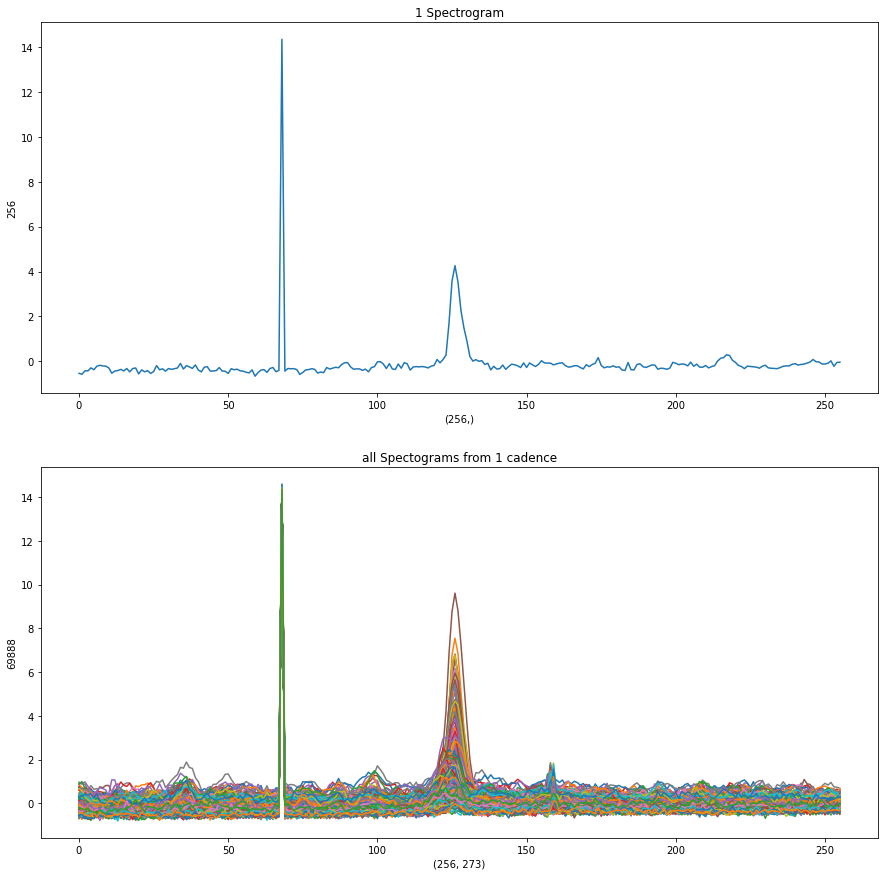

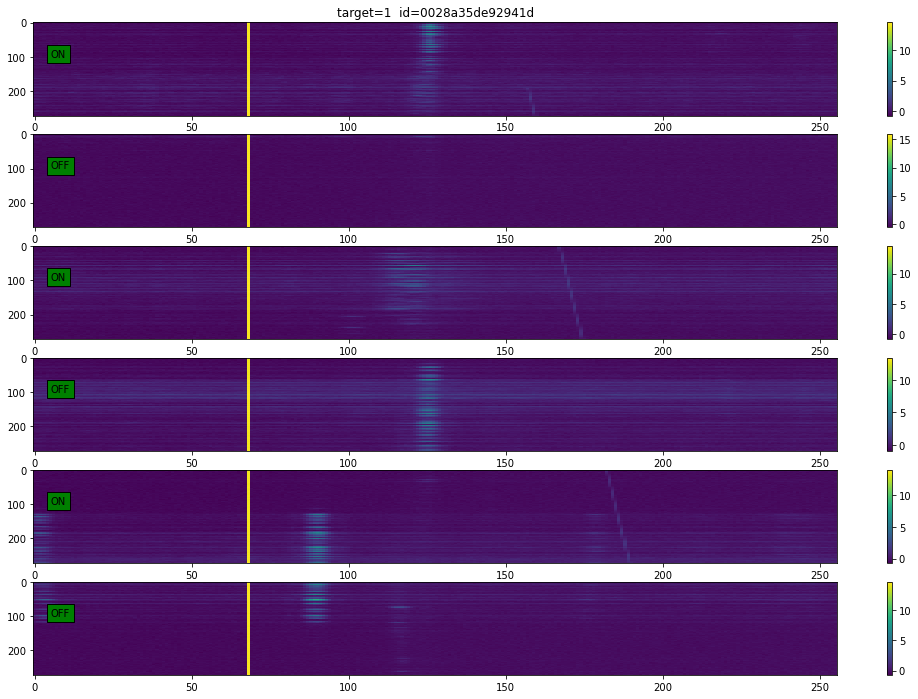

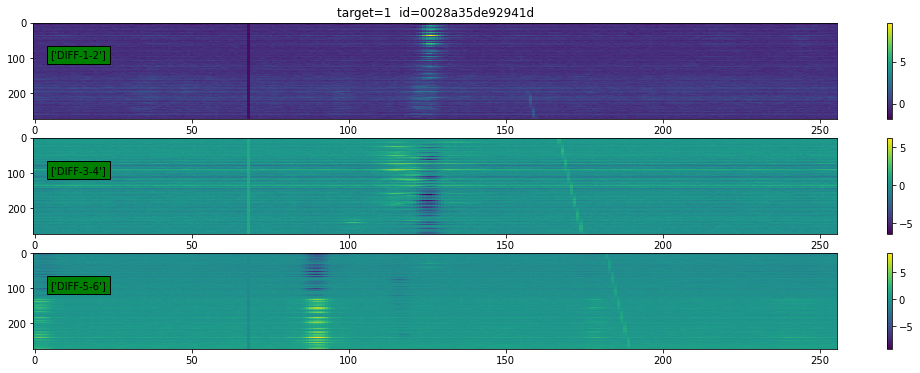

In [56]:
finding = train.loc[train['target'] == 1].iloc[1]
data = np.load(finding['img_path'])

figure,axis = plt.subplots(2,1,figsize=(15,15))
axis[0].set_title("1 Spectrogram")
axis[0].set_xlabel(data[0][0].shape)
axis[0].set_ylabel(data[0][0].size)
axis[0].plot(data[0][0])
axis[1].set_title("all Spectograms from 1 cadence")
axis[1].set_xlabel(data[0].T.shape)
axis[1].set_ylabel(data[0].T.size)
axis[1].plot(data[0].T)

cadence(finding)
diff_cadence(finding)

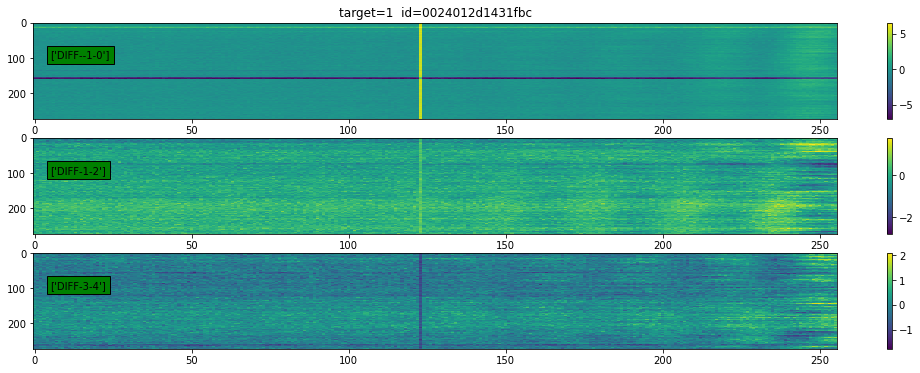

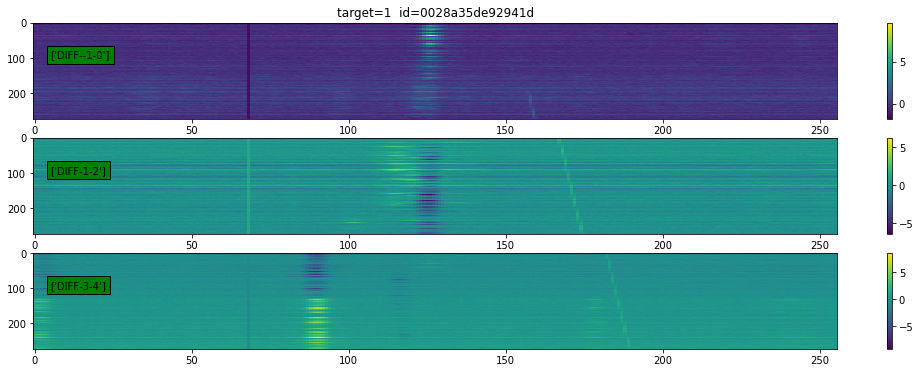

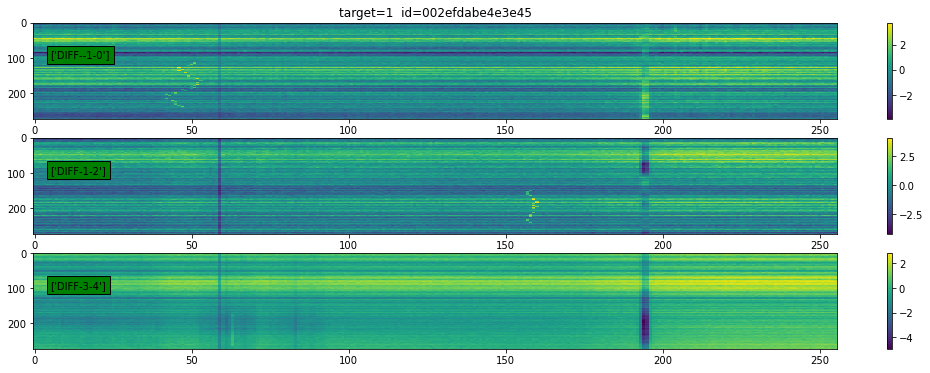

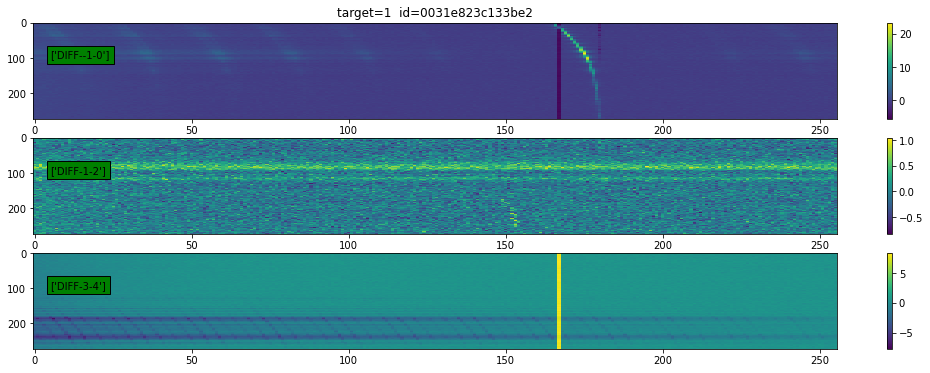

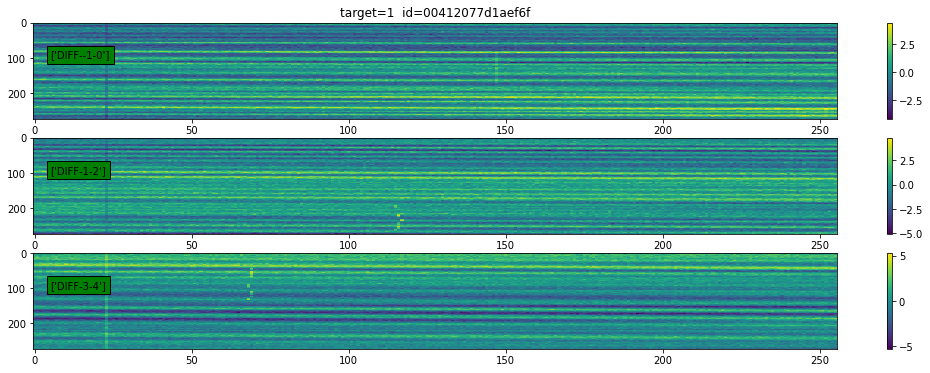

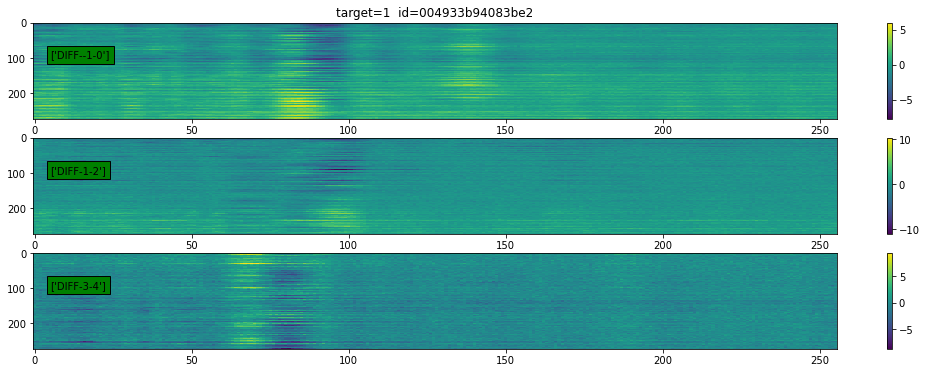

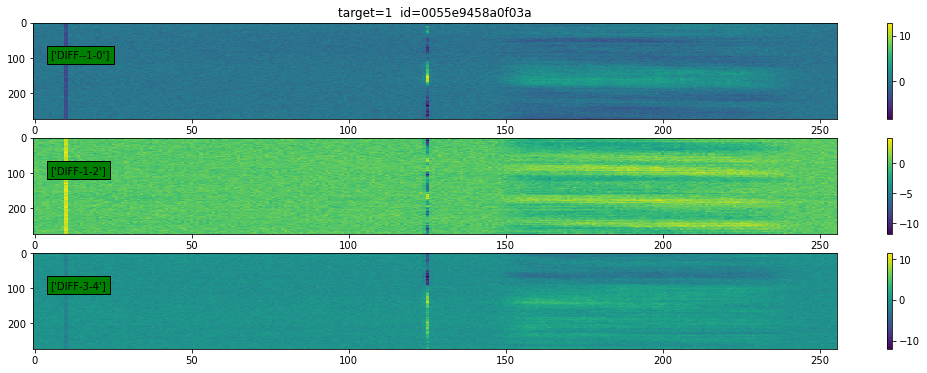

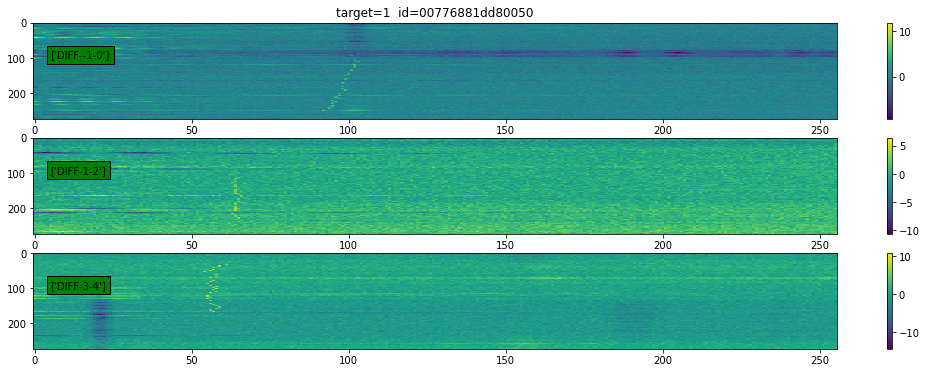

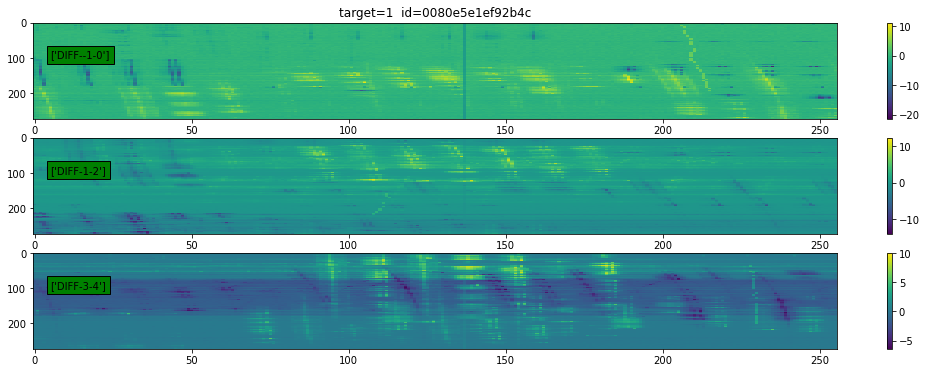

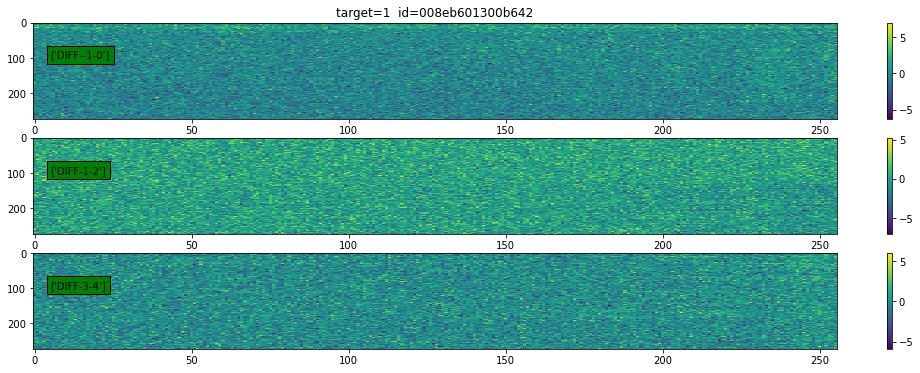

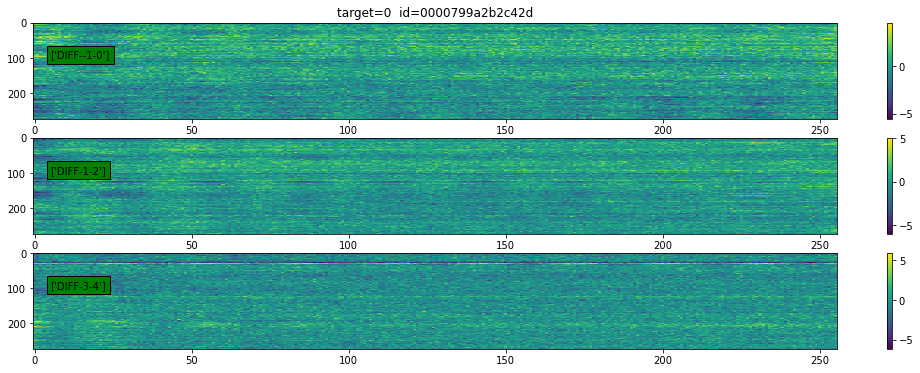

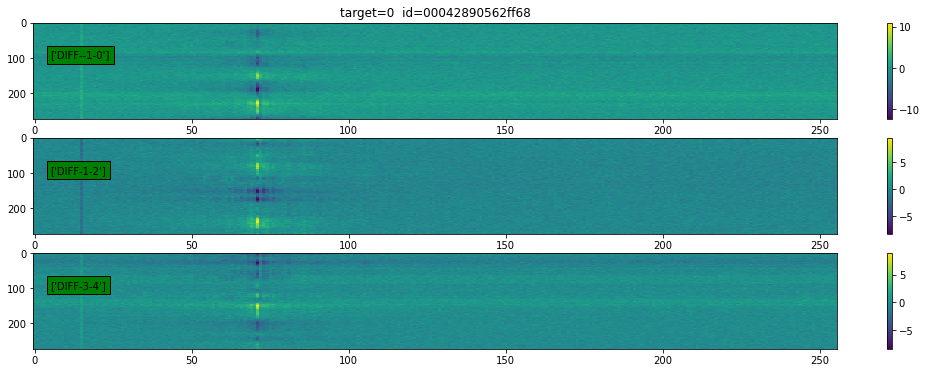

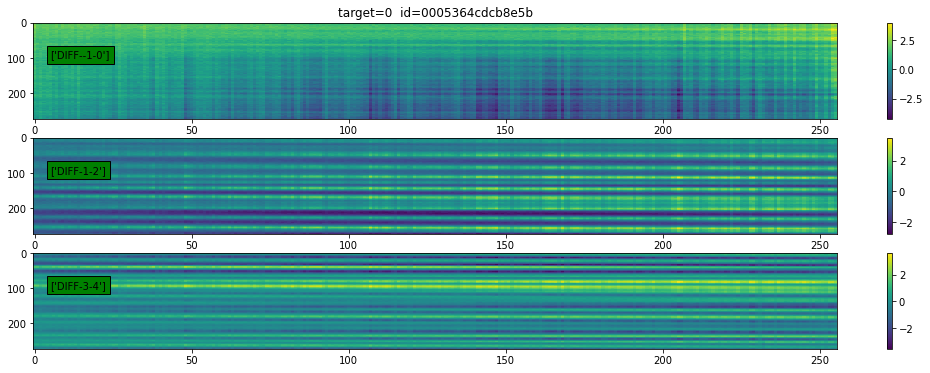

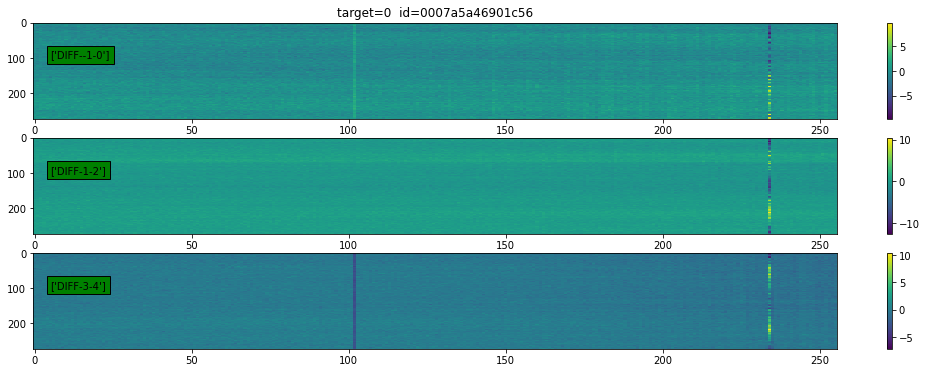

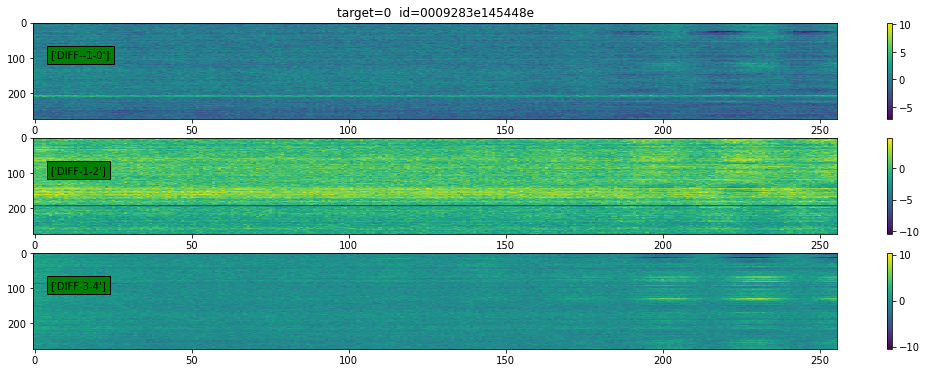

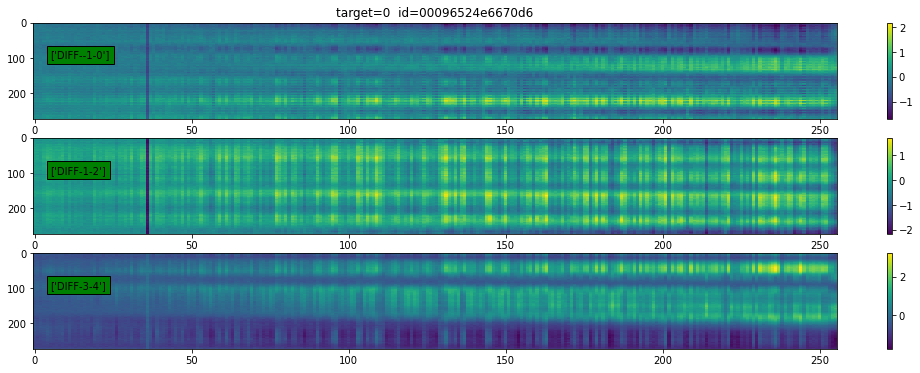

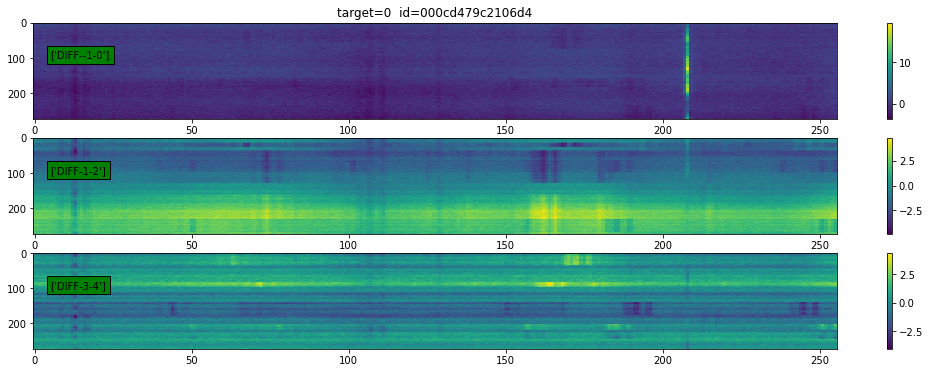

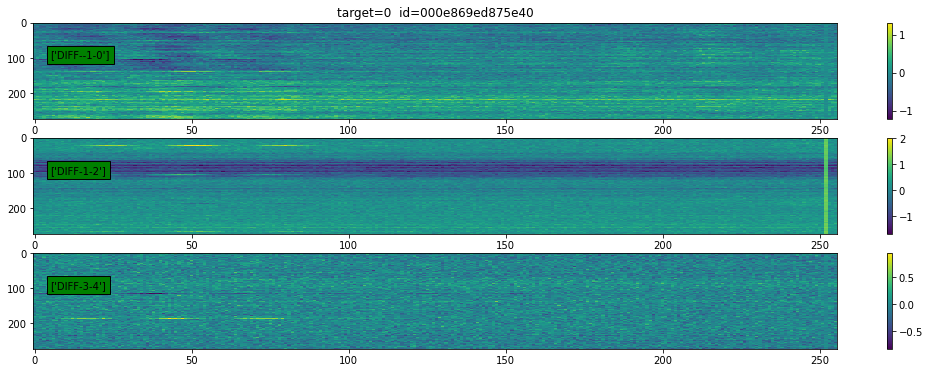

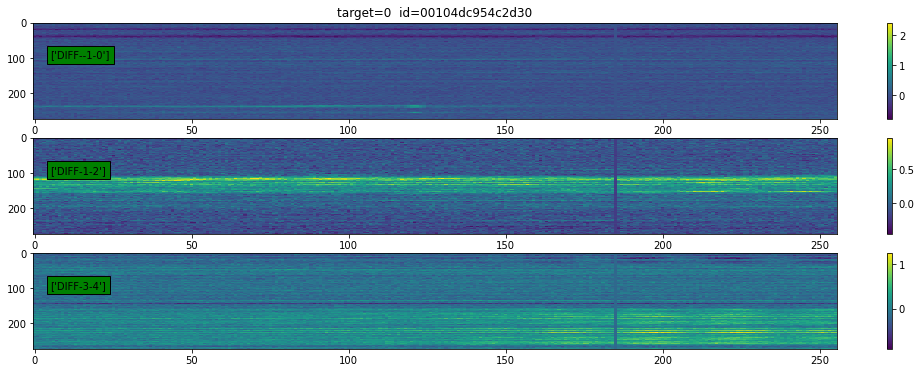

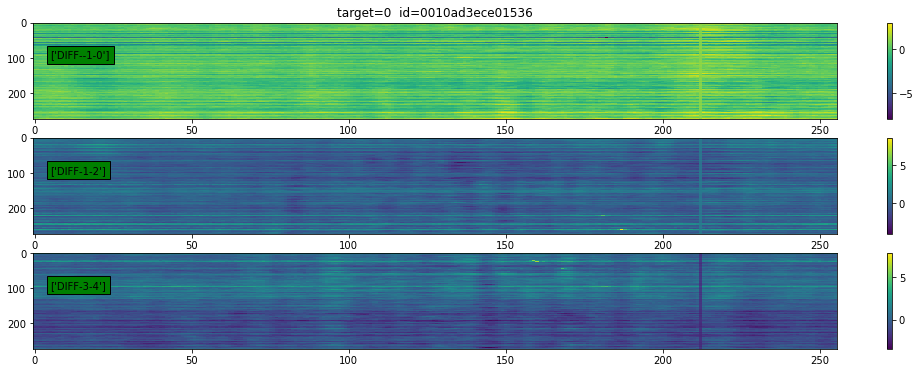

In [54]:
for i in range(0,10):
    diff_cadence(train.loc[train['target'] == 1].iloc[i])

for i in range(0,10):
    diff_cadence(train.loc[train['target'] == 0].iloc[i])
#label targets and show a lot of data
